In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("StatisticModel.csv")
df

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
0,GradientBoostRG,VarianceThreshold,100,NaN,LabelEncoder,SimpleImputer,0.898733,17011.333487
1,GradientBoostRG,VarianceThreshold,110,NaN,LabelEncoder,SimpleImputer,0.894075,17185.558700
2,GradientBoostRG,VarianceThreshold,120,NaN,LabelEncoder,SimpleImputer,0.897373,17164.174992
3,GradientBoostRG,VarianceThreshold,130,NaN,LabelEncoder,SimpleImputer,0.894501,17195.923440
4,GradientBoostRG,VarianceThreshold,140,NaN,LabelEncoder,SimpleImputer,0.902729,16972.291268
...,...,...,...,...,...,...,...,...
619,GradientBoostRG,UFS,75,Minmaxscaler,OnehotEncoder,KnnImputer,0.898492,17540.089707
620,GradientBoostRG,UFS,85,Minmaxscaler,OnehotEncoder,KnnImputer,0.906517,16888.043826
621,GradientBoostRG,UFS,95,Minmaxscaler,OnehotEncoder,KnnImputer,0.903412,17197.895304
622,GradientBoostRG,UFS,105,Minmaxscaler,OnehotEncoder,KnnImputer,0.902296,17037.328974


In [3]:
df["Scaler"]=df["Scaler"].fillna("None")
df["Imputer"]=df["Imputer"].apply(lambda x:"SimpleImputer" if x=="Simpleimputer" else x)

In [4]:
df.sort_values("R2",ascending=False)

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
593,GradientBoostRG,VarianceThreshold,310,Minmaxscaler,OnehotEncoder,KnnImputer,0.913034,16538.927696
359,GradientBoostRG,UFS,75,None,OnehotEncoder,SimpleImputer,0.912757,17209.661095
573,GradientBoostRG,VarianceThreshold,110,Minmaxscaler,OnehotEncoder,KnnImputer,0.912660,16583.433446
572,GradientBoostRG,VarianceThreshold,100,Minmaxscaler,OnehotEncoder,KnnImputer,0.912046,16695.184241
363,GradientBoostRG,UFS,115,None,OnehotEncoder,SimpleImputer,0.911614,17203.893419
...,...,...,...,...,...,...,...,...
245,GradientBoostRG,VarianceThreshold,470,Normalizer,LabelEncoder,KnnImputer,0.514113,37250.964184
558,GradientBoostRG,VarianceThreshold,480,Normalizer,OnehotEncoder,KnnImputer,0.505182,38445.676137
559,GradientBoostRG,VarianceThreshold,490,Normalizer,OnehotEncoder,KnnImputer,0.499469,38505.575784
247,GradientBoostRG,VarianceThreshold,490,Normalizer,LabelEncoder,KnnImputer,0.387677,43516.335316


# Distribution of R2 Score

<Axes: xlabel='R2', ylabel='Count'>

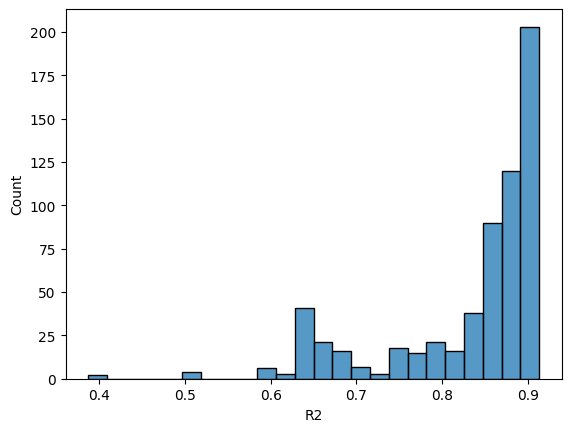

In [5]:
sns.histplot(data=df,x="R2")

# R2 score depend on UFS

Text(0.5, 0, 'Number of feature')

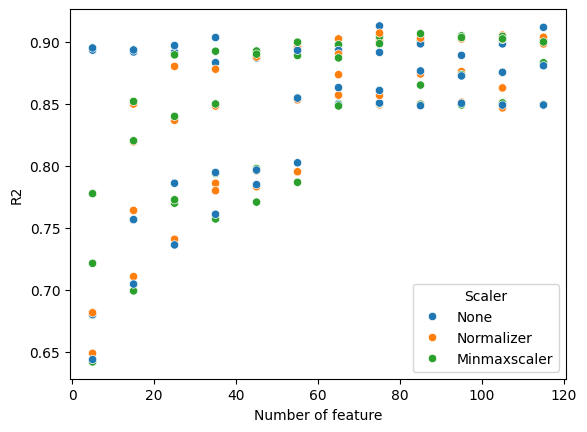

In [6]:
sns.scatterplot(data=df.loc[(df["feature_selection"]=="UFS")],x="NOF",y="R2",hue="Scaler")
plt.xlabel("Number of feature")

In [7]:
def find(nof,feature):
    maxr2_for_each_NOF=df.loc[(df["feature_selection"]==feature)].loc[(df["NOF"]==nof)]
    maxr2_for_each_NOF=maxr2_for_each_NOF.sort_values("R2",ascending=False).head(1)
    return maxr2_for_each_NOF

In [8]:
maxr2_for_each_NOF=find(5,"UFS")
for i in range(6,121):
    maxr2_for_each_NOF=pd.concat([maxr2_for_each_NOF,find(i,"UFS")])
maxr2_for_each_NOF

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
352,GradientBoostRG,UFS,5,None,OnehotEncoder,SimpleImputer,0.895014,18501.733233
353,GradientBoostRG,UFS,15,None,OnehotEncoder,SimpleImputer,0.893407,18166.010158
354,GradientBoostRG,UFS,25,None,OnehotEncoder,SimpleImputer,0.896950,18008.391487
43,GradientBoostRG,UFS,35,None,LabelEncoder,SimpleImputer,0.903426,17013.618739
304,GradientBoostRG,UFS,45,Minmaxscaler,LabelEncoder,KnnImputer,0.892553,18096.710802
617,GradientBoostRG,UFS,55,Minmaxscaler,OnehotEncoder,KnnImputer,0.899657,17653.688877
254,GradientBoostRG,UFS,65,Normalizer,LabelEncoder,KnnImputer,0.902317,16877.995485
359,GradientBoostRG,UFS,75,None,OnehotEncoder,SimpleImputer,0.912757,17209.661095
620,GradientBoostRG,UFS,85,Minmaxscaler,OnehotEncoder,KnnImputer,0.906517,16888.043826
309,GradientBoostRG,UFS,95,Minmaxscaler,LabelEncoder,KnnImputer,0.904719,16779.024833


# Max R2 for each NOF

<Axes: xlabel='NOF', ylabel='R2'>

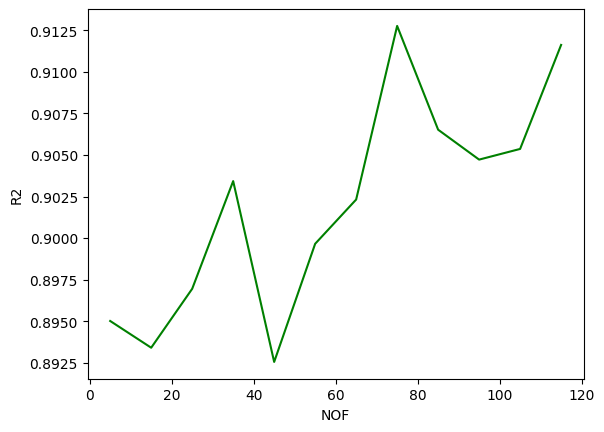

In [9]:
sns.lineplot(data=maxr2_for_each_NOF,x="NOF",y="R2",color="green")

In [10]:
maxr2_for_each_thresh=find(100,"VarianceThreshold")
for i in range(101,501):
    maxr2_for_each_thresh=pd.concat([maxr2_for_each_thresh,find(i,"VarianceThreshold")])
maxr2_for_each_thresh

,Model,feature_selection,NOF,Scaler,Encoder,Imputer,R2,MAE
572,GradientBoostRG,VarianceThreshold,100,Minmaxscaler,OnehotEncoder,KnnImputer,0.912046,16695.184241
573,GradientBoostRG,VarianceThreshold,110,Minmaxscaler,OnehotEncoder,KnnImputer,0.912660,16583.433446
574,GradientBoostRG,VarianceThreshold,120,Minmaxscaler,OnehotEncoder,KnnImputer,0.911124,16599.620794
315,GradientBoostRG,VarianceThreshold,130,None,OnehotEncoder,SimpleImputer,0.906296,17130.408908
576,GradientBoostRG,VarianceThreshold,140,Minmaxscaler,OnehotEncoder,KnnImputer,0.908165,16839.060306
265,GradientBoostRG,VarianceThreshold,150,Minmaxscaler,LabelEncoder,KnnImputer,0.903285,16823.750720
578,GradientBoostRG,VarianceThreshold,160,Minmaxscaler,OnehotEncoder,KnnImputer,0.907301,16797.001900
579,GradientBoostRG,VarianceThreshold,170,Minmaxscaler,OnehotEncoder,KnnImputer,0.911175,16679.151689
268,GradientBoostRG,VarianceThreshold,180,Minmaxscaler,LabelEncoder,KnnImputer,0.907162,16570.903651
581,GradientBoostRG,VarianceThreshold,190,Minmaxscaler,OnehotEncoder,KnnImputer,0.908323,16874.172474


Text(0.5, 0, 'Threshold')

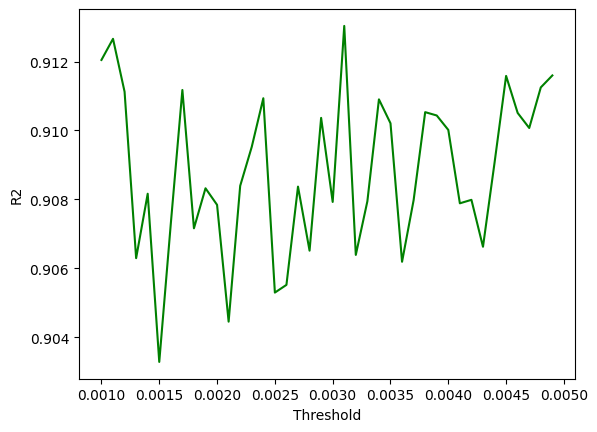

In [11]:
sns.lineplot(data=maxr2_for_each_thresh,x=df["NOF"]/100000,y="R2",color="green")
plt.xlabel("Threshold")

# R2 score depend on Variance Threshold

Text(0.5, 0, 'Threshold')

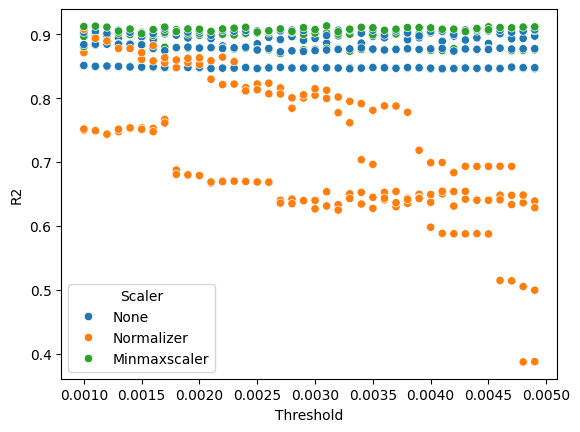

In [12]:
sns.scatterplot(data=df.loc[(df["feature_selection"]=="VarianceThreshold")],x=df["NOF"]/100000,y="R2",hue="Scaler")
plt.xlabel("Threshold")

# R2 depend on Scaler

<Axes: xlabel='Scaler', ylabel='R2'>

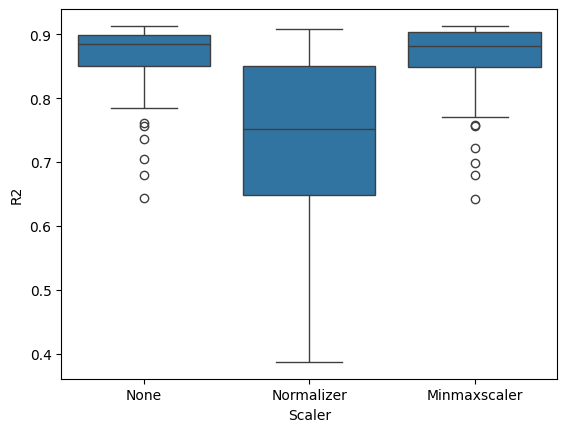

In [13]:
sns.boxplot(data=df, x="Scaler",y="R2")

# R2 depend on Imputer

<Axes: xlabel='Imputer', ylabel='R2'>

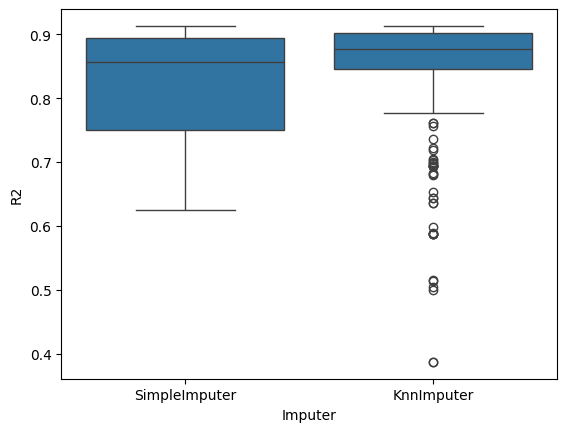

In [14]:
sns.boxplot(data=df,x="Imputer",y="R2")

<Axes: xlabel='Encoder', ylabel='R2'>

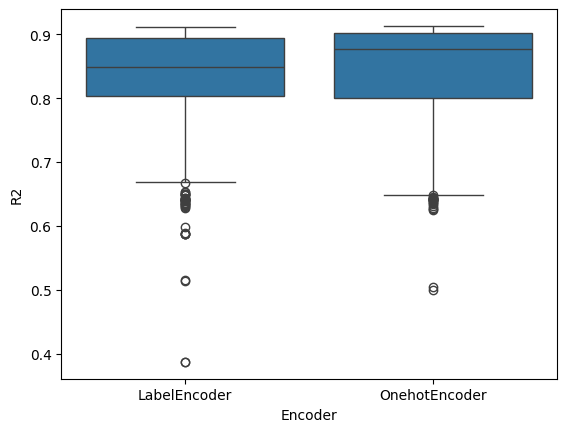

In [15]:
sns.boxplot(data=df,x="Encoder",y="R2")